In [2]:
import pandas as pd
import pyspark.sql.functions as F
from datetime import datetime
from pyspark.sql.types import *
# from wordcloud import WordCloud, STOPWORDS
import numpy as np
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
pd.set_option("mode.chained_assignment", None)

In [3]:
# !pip install plotly
# !pip install -U kaleido

In [4]:
# dataviz
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import kaleido

In [ ]:
# spark = SparkSession.builder.getOrCreate()
# TMP_BUCKET = "ai-covid-tmp"
# spark.conf.set("temporaryGcsBucket", TMP_BUCKET)
# spark.sparkContext.setCheckpointDir("hdfs:///tmp/")
# sc = spark.sparkContext

<hr />

<hr />

In [5]:
# reading super_srag data
super_srag = spark.read.parquet('gs://ai-covid19-datalake/standard/super-srag/super_srag_v1.parquet')

In [6]:
super_srag.printSchema()

root
 |-- NU_NOTIFIC: long (nullable = true)
 |-- CS_SEXO: string (nullable = true)
 |-- DT_NASC: date (nullable = true)
 |-- AGE_AT_NOTIF: long (nullable = true)
 |-- AGE_GROUP: integer (nullable = true)
 |-- CS_GESTANT: integer (nullable = true)
 |-- CS_RACA: integer (nullable = true)
 |-- CS_ETINIA: string (nullable = true)
 |-- CS_ESCOL_N: integer (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- CO_MUN_RES: integer (nullable = true)
 |-- SEM_PRI: string (nullable = true)
 |-- SEM_NOT: string (nullable = true)
 |-- DIST_PRI_NOTIFIC: integer (nullable = true)
 |-- DT_SIN_PRI: date (nullable = true)
 |-- SG_UF_NOT: string (nullable = true)
 |-- CO_MUN_NOT: string (nullable = true)
 |-- SURTO_SG: integer (nullable = true)
 |-- NOSOCOMIAL: integer (nullable = true)
 |-- AVE_SUINO: integer (nullable = true)
 |-- VACINA: integer (nullable = true)
 |-- HOSPITAL: string (nullable = true)
 |-- DIST_PRI_INTERNA: integer (nullable = true)
 |-- SUPORT_VEN: integer (nullable = true)
 

In [28]:
states = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ']

In [29]:
pd_ba_ss['SS_NOTFIC_COUNT_BA'] = pd_ba_ss['SS_NOTFIC_COUNT_BA']/10

NameError: name 'pd_ba_ss' is not defined

In [44]:
pd_ba_ss = super_srag.filter((F.col('SG_UF_NOT')=='BA') & (F.year(F.col('DT_SIN_PRI')) == 2020)).groupBy('EPI_WEEK_YEAR')\
                                                                                         .agg({'GMR_RESIDENTIAL_PERCENT_AVG':'avg',
                                                                                               'INMET_RELATIVE_AIR_HUMIDITY_AVG':'avg',
                                                                                               'NU_NOTIFIC':'count'})\
                                                                                         .orderBy('EPI_WEEK_YEAR')\
                                                                                         .withColumnRenamed('avg(GMR_RESIDENTIAL_PERCENT_AVG)', 'GMR_RESID_PERC_AVG_BA')\
                                                                                         .withColumnRenamed('avg(INMET_RELATIVE_AIR_HUMIDITY_AVG)', 'INMET_REL_AIR_HUM_AVG_BA')\
                                                                                         .withColumnRenamed('count(NU_NOTIFIC)', 'SS_NOTFIC_COUNT_BA')\
                                                                                         .toPandas()
pd_ba_ss['SS_NOTFIC_COUNT_BA'] = pd_ba_ss['SS_NOTFIC_COUNT_BA']/10

In [45]:
# plotting
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=pd_ba_ss['EPI_WEEK_YEAR'].tolist(), y=pd_ba_ss['GMR_RESID_PERC_AVG_BA'].tolist(), name='isolation avg',
                         line=dict(color='firebrick', width=4, shape='spline')))

fig.add_trace(go.Scatter(x=pd_ba_ss['EPI_WEEK_YEAR'].tolist(), y=pd_ba_ss['INMET_REL_AIR_HUM_AVG_BA'].tolist(), name='air humid. avg',
                         line=dict(color='green', width=4, shape='spline')))

fig.add_trace(go.Scatter(x=pd_ba_ss['EPI_WEEK_YEAR'].tolist(), y=pd_ba_ss['SS_NOTFIC_COUNT_BA'].tolist(), name='N cases x 10',
                         line=dict(color='blue', width=4, shape='spline')))

# Edit the layout
fig.update_layout(title='notifications | air humidity avg | isolation avg - BA 2020',
                   xaxis_title='epidemiological week',
                   yaxis_title='N'
                 )

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                  width=1400
                 )

fig.write_image("ba_gmr_inmet_test_2021.png")
# fig.show()

In [46]:
pd_ba_ss_2w = super_srag.filter((F.col('SG_UF_NOT')=='BA') & (F.year(F.col('DT_SIN_PRI')) == 2020)).groupBy('EPI_WEEK_YEAR')\
                                                                                         .agg({'GMR_RESIDENTIAL_PERCENT_2WEEKS_AVG':'avg',
                                                                                               'INMET_RELATIVE_AIR_HUMIDITY_2WEEKS_BEFORE_AVG':'avg',
                                                                                               'NU_NOTIFIC':'count'})\
                                                                                         .orderBy('EPI_WEEK_YEAR')\
                                                                                         .withColumnRenamed('avg(GMR_RESIDENTIAL_PERCENT_2WEEKS_AVG)', 'GMR_RESID_PERC_AVG_2W_BA')\
                                                                                         .withColumnRenamed('avg(INMET_RELATIVE_AIR_HUMIDITY_2WEEKS_BEFORE_AVG)', 'INMET_REL_AIR_HUM_AVG_2W_BA')\
                                                                                         .withColumnRenamed('count(NU_NOTIFIC)', 'SS_NOTFIC_COUNT_BA')\
                                                                                         .toPandas()
pd_ba_ss_2w['SS_NOTFIC_COUNT_BA'] = pd_ba_ss_2w['SS_NOTFIC_COUNT_BA']/10

In [47]:
# plotting
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=pd_ba_ss_2w['EPI_WEEK_YEAR'].tolist(), y=pd_ba_ss_2w['GMR_RESID_PERC_AVG_2W_BA'].tolist(), name='isolation avg 2w before',
                         line=dict(color='firebrick', width=4, shape='spline')))

fig.add_trace(go.Scatter(x=pd_ba_ss_2w['EPI_WEEK_YEAR'].tolist(), y=pd_ba_ss_2w['INMET_REL_AIR_HUM_AVG_2W_BA'].tolist(), name='air humid. avg 2w before',
                         line=dict(color='green', width=4, shape='spline')))

fig.add_trace(go.Scatter(x=pd_ba_ss_2w['EPI_WEEK_YEAR'].tolist(), y=pd_ba_ss_2w['SS_NOTFIC_COUNT_BA'].tolist(), name='N cases x 10',
                         line=dict(color='blue', width=4, shape='spline')))

# Edit the layout
fig.update_layout(title='notifications | air humidity avg | isolation avg - BA 2020',
                   xaxis_title='epidemiological week',
                   yaxis_title='N'
                 )

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                  width=1400
                 )

fig.write_image("ba_gmr_inmet_test_2w_2021.png")
# fig.show()

<hr />
<hr />
<hr />

In [11]:
# 
super_srag.groupBy(['AGE_GROUP',F.year('DT_SIN_PRI')]).count().orderBy('AGE_GROUP').show(50)

+---------+----------------+------+
|AGE_GROUP|year(DT_SIN_PRI)| count|
+---------+----------------+------+
|        1|            2019| 14470|
|        1|            2018|    20|
|        1|            2020| 23337|
|        1|            2021| 19780|
|        2|            2021| 19021|
|        2|            2020| 32597|
|        2|            2018|    18|
|        2|            2019|  9853|
|        3|            2018|     7|
|        3|            2020| 34120|
|        3|            2021| 14160|
|        3|            2019|  3790|
|        4|            2020| 53775|
|        4|            2019|  2455|
|        4|            2021| 32991|
|        4|            2018|     2|
|        5|            2020|104509|
|        5|            2018|     6|
|        5|            2021| 84869|
|        5|            2019|  2900|
|        6|            2021|129804|
|        6|            2020|143173|
|        6|            2019|  2755|
|        6|            2018|     3|
|        7|            2018|

In [23]:
super_srag.filter(F.year('DT_SIN_PRI') == 2019).groupBy(F.year('DT_SIN_PRI')).count().show()

+----------------+-----+
|year(DT_SIN_PRI)|count|
+----------------+-----+
|            2019|48597|
+----------------+-----+



In [ ]:
super_srag.filter(F.year('DT_SIN_PRI') == 2019).

In [6]:
df_2019 = super_srag.filter(F.year('DT_SIN_PRI') == 2019).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2019 = df_2019.fillna('NULO')

In [7]:
df_2020 = super_srag.filter(F.year('DT_SIN_PRI') == 2020).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2020 = df_2020.fillna('NULO')

In [8]:
df_2021 = super_srag.filter(F.year('DT_SIN_PRI') == 2021).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2021 = df_2021.fillna('NULO')

In [9]:
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(1, '< 1')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(2, '1a5')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(3, '6a19')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(4, '20a29')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(5, '30a39')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(6, '40 a 49')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(7, '50 a 59')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(8, '60 a 69')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(9, '70 a 79')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(10, '80 a 89')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(11, '90+')
df_2019['AGE_GROUP'] = df_2019['AGE_GROUP'].replace(12, 'NULO')

In [10]:
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(1, '< 1')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(2, '1a5')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(3, '6a19')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(4, '20a29')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(5, '30a39')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(6, '40 a 49')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(7, '50 a 59')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(8, '60 a 69')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(9, '70 a 79')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(10, '80 a 89')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(11, '90+')
df_2020['AGE_GROUP'] = df_2020['AGE_GROUP'].replace(12, 'NULO')

In [11]:
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(1, '< 1')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(2, '1a5')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(3, '6a19')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(4, '20a29')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(5, '30a39')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(6, '40 a 49')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(7, '50 a 59')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(8, '60 a 69')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(9, '70 a 79')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(10, '80 a 89')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(11, '90+')
df_2021['AGE_GROUP'] = df_2021['AGE_GROUP'].replace(12, 'NULO')

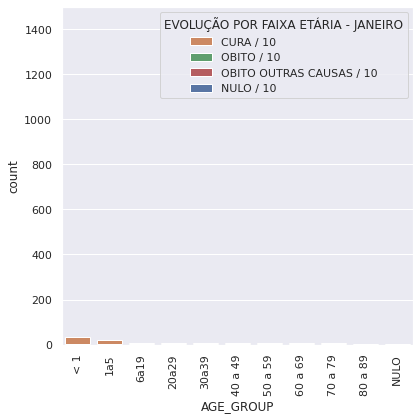

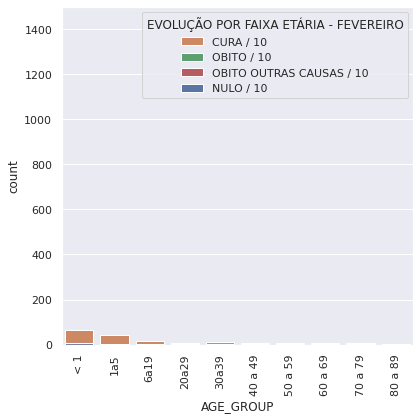

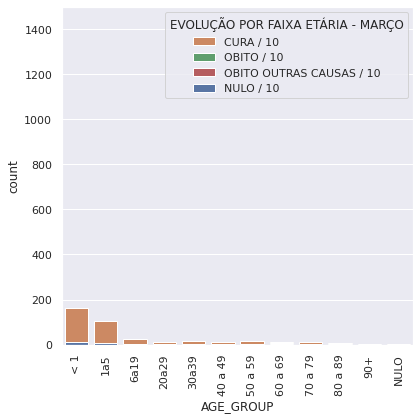

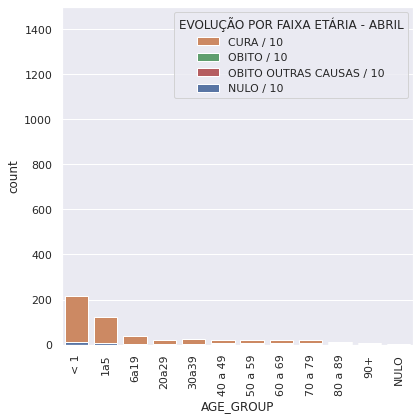

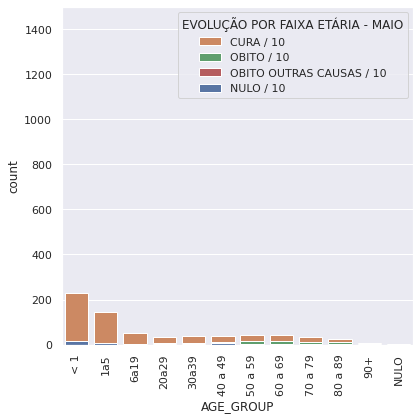

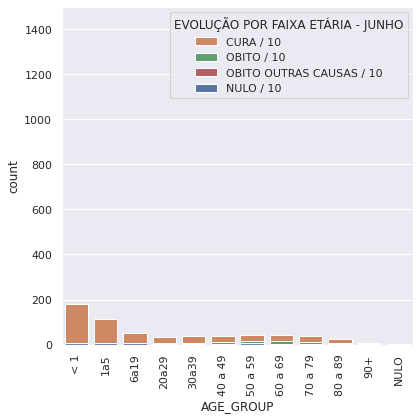

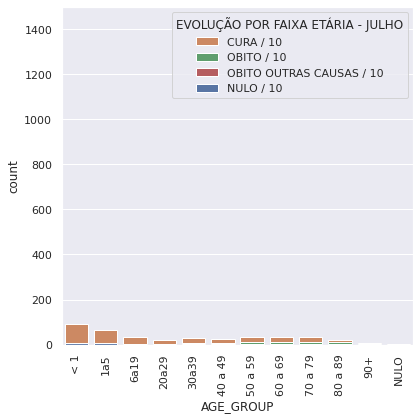

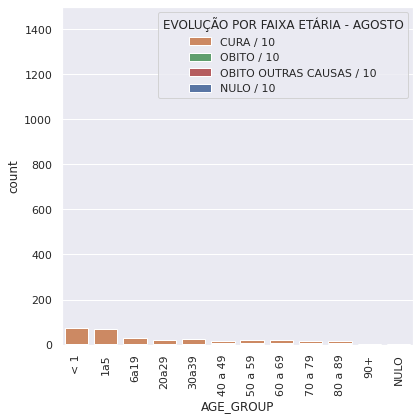

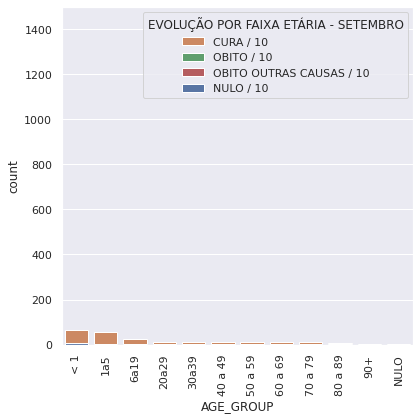

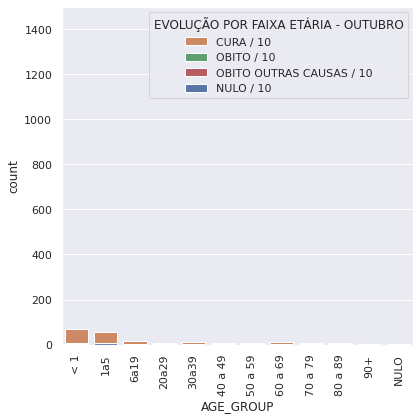

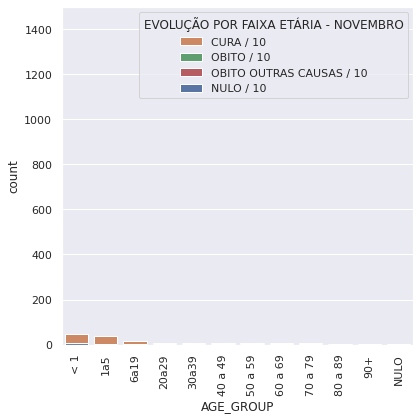

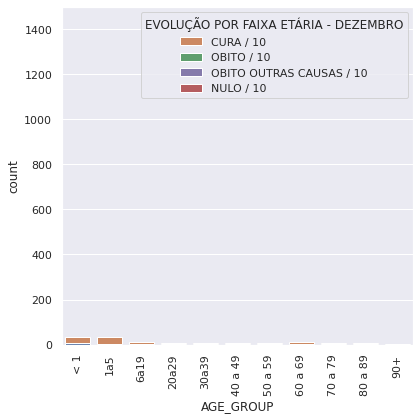

In [34]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

unique = df_2019["EVOLUCAO"].append(df_2019["AGE_GROUP"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})

months = {1:'JANEIRO', 2:'FEVEREIRO', 3:'MARÇO', 4:'ABRIL', 5:'MAIO', 6:'JUNHO',
          7:'JULHO', 8:'AGOSTO', 9:'SETEMBRO', 10:'OUTUBRO', 11:'NOVEMBRO', 12:'DEZEMBRO'}

for month in months:

    # set the figure size
    plt.figure(figsize=(6, 6))
    
    evolutions_cat = {'1': 'CURA', '2': 'ÓBITO', '3': 'ÓBITO OUTRAS CAUSA', '9': 'IGNORADO', 'NULO': 'NULO'}

    data = df_2019[(df_2019['month(DT_SIN_PRI)'] == month) & (df_2019['EVOLUCAO'] == '1')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar1 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, ci=None, palette=palette)
        leg_bar1 = mpatches.Patch(color='darkblue', label='CURA')
        bar1.set(ylim=(0, 1500))

    data = df_2019[(df_2019['month(DT_SIN_PRI)'] == month) & (df_2019['EVOLUCAO'] == '2')]  
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar2 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar2 = mpatches.Patch(color='darkblue' ,label='ÓBITO')
        bar2.set(ylim=(0, 1500))

    data = df_2019[(df_2019['month(DT_SIN_PRI)'] == month) & (df_2019['EVOLUCAO'] == '3')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar3 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar3 = mpatches.Patch(color='darkblue', label='ÓBITO OUTRAS CAUSAS')
        bar3.set(ylim=(0, 1500))

    data = df_2019[(df_2019['month(DT_SIN_PRI)'] == month) & (df_2019['EVOLUCAO'] == '9')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar4 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar4 = mpatches.Patch(color='darkblue', label='IGNORADO')
        bar4.set(ylim=(0, 1500))

    data = df_2019[(df_2019['month(DT_SIN_PRI)'] == month) & (df_2019['EVOLUCAO'] == 'NULO')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar5 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar5 = mpatches.Patch(color='darkblue', label='NULO')
        bar5.set(ylim=(0, 1500))

    plt.legend(title='EVOLUÇÃO POR FAIXA ETÁRIA - ' + months[month], loc='upper right', labels=['CURA / 10', 'OBITO / 10', 'OBITO OUTRAS CAUSAS / 10', 'NULO / 10'])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

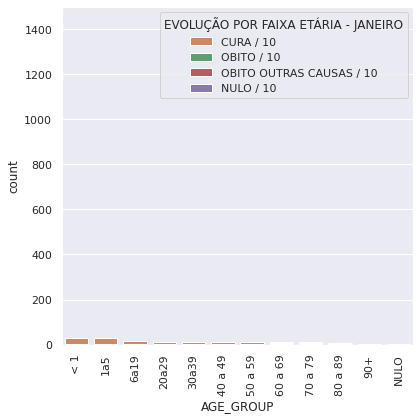

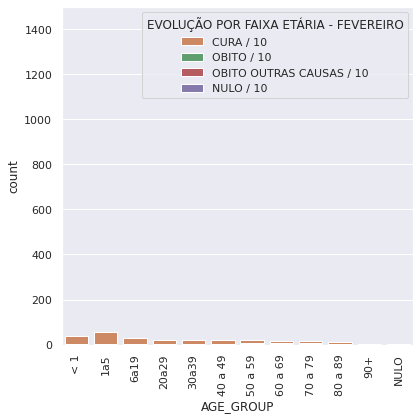

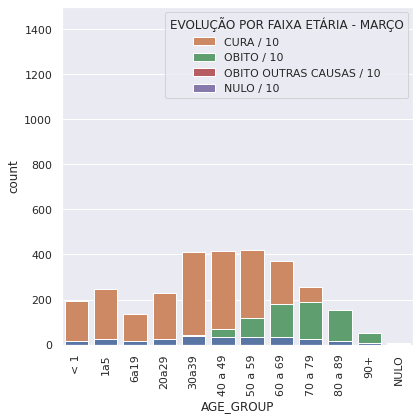

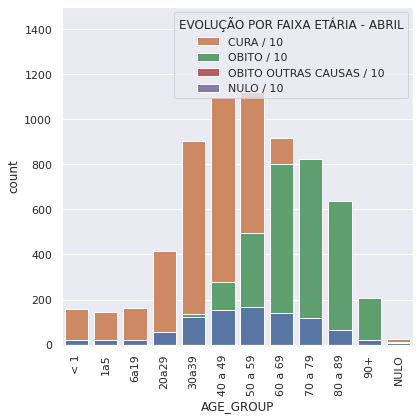

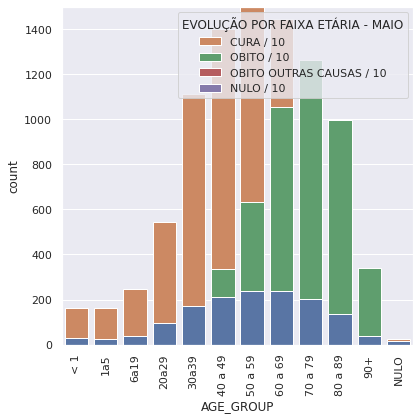

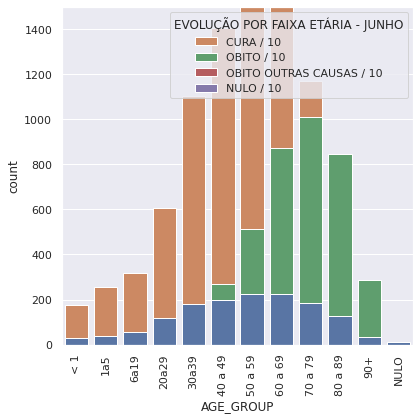

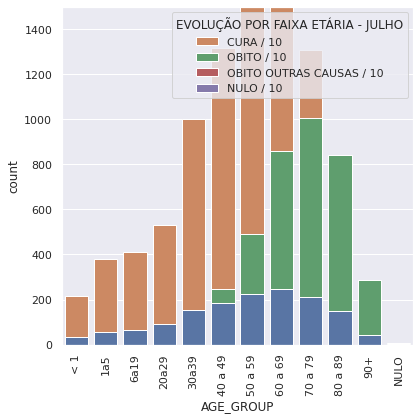

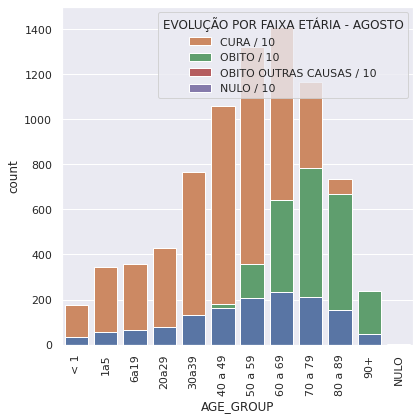

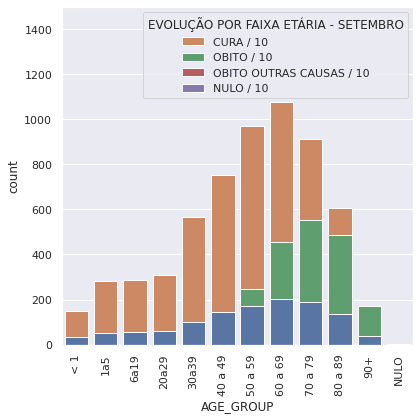

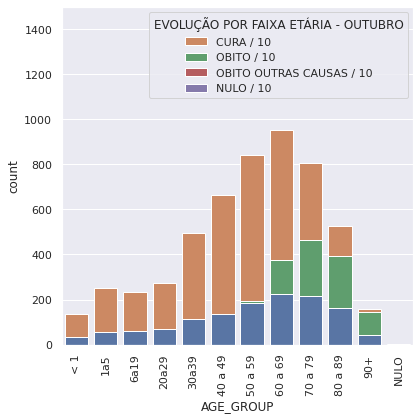

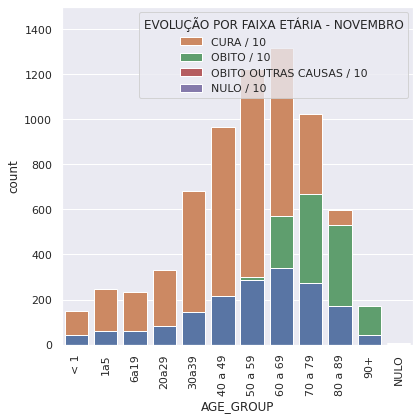

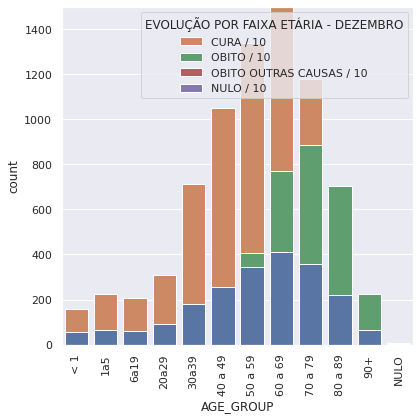

In [35]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

unique = df_2020["EVOLUCAO"].append(df_2020["AGE_GROUP"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})

months = {1:'JANEIRO', 2:'FEVEREIRO', 3:'MARÇO', 4:'ABRIL', 5:'MAIO', 6:'JUNHO',
          7:'JULHO', 8:'AGOSTO', 9:'SETEMBRO', 10:'OUTUBRO', 11:'NOVEMBRO', 12:'DEZEMBRO'}

for month in months:

    # set the figure size
    plt.figure(figsize=(6, 6))
    
    evolutions_cat = {'1': 'CURA', '2': 'ÓBITO', '3': 'ÓBITO OUTRAS CAUSA', '9': 'IGNORADO', 'NULO': 'NULO'}

    data = df_2020[(df_2020['month(DT_SIN_PRI)'] == month) & (df_2020['EVOLUCAO'] == '1')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar1 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, ci=None, palette=palette)
        leg_bar1 = mpatches.Patch(color='darkblue', label='CURA')
        bar1.set(ylim=(0, 1500))

    data = df_2020[(df_2020['month(DT_SIN_PRI)'] == month) & (df_2020['EVOLUCAO'] == '2')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar2 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar2 = mpatches.Patch(color='darkblue' ,label='ÓBITO')
        bar2.set(ylim=(0, 1500))

    data = df_2020[(df_2020['month(DT_SIN_PRI)'] == month) & (df_2020['EVOLUCAO'] == '3')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar3 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar3 = mpatches.Patch(color='darkblue', label='ÓBITO OUTRAS CAUSAS')
        bar3.set(ylim=(0, 1500))

    data = df_2020[(df_2020['month(DT_SIN_PRI)'] == month) & (df_2020['EVOLUCAO'] == '9')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar4 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar4 = mpatches.Patch(color='darkblue', label='IGNORADO')
        bar4.set(ylim=(0, 1500))

    data = df_2020[(df_2020['month(DT_SIN_PRI)'] == month) & (df_2020['EVOLUCAO'] == 'NULO')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar5 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar5 = mpatches.Patch(color='darkblue', label='NULO')
        bar5.set(ylim=(0, 1500))

    plt.legend(title='EVOLUÇÃO POR FAIXA ETÁRIA - ' + months[month], loc='upper right', labels=['CURA / 10', 'OBITO / 10', 'OBITO OUTRAS CAUSAS / 10', 'NULO / 10'])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

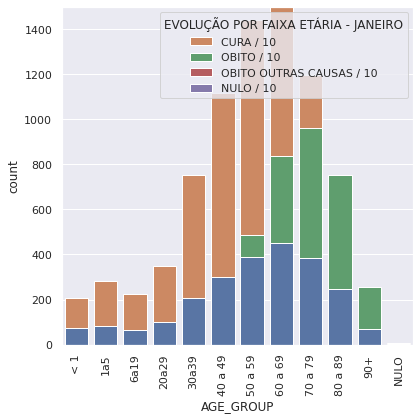

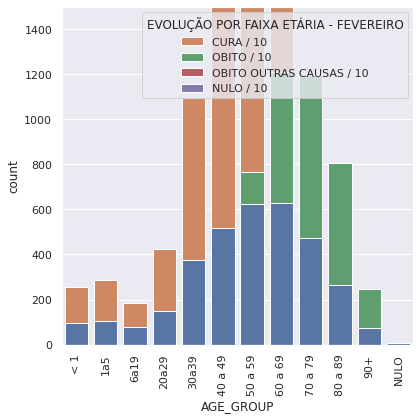

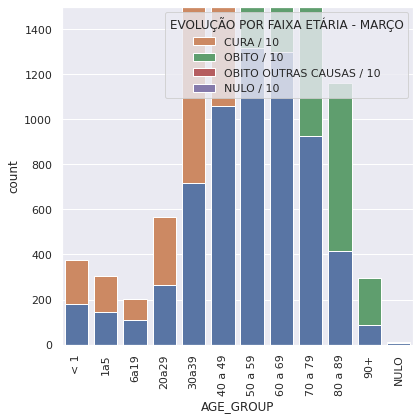

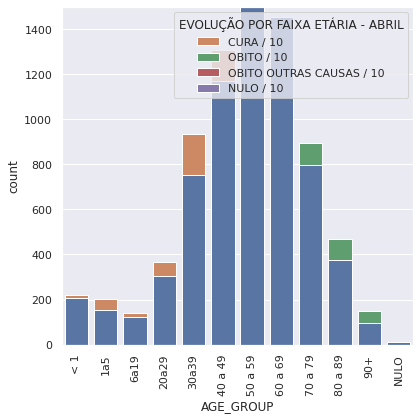

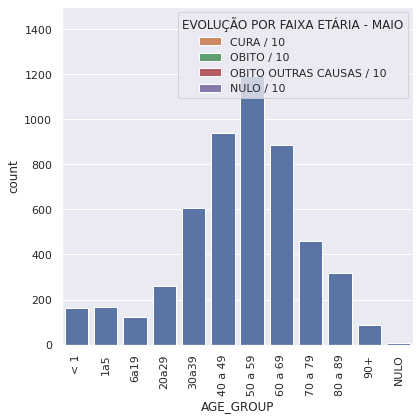

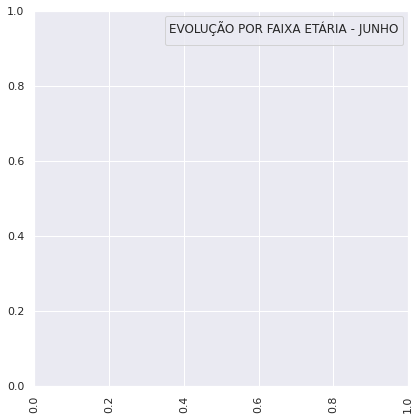

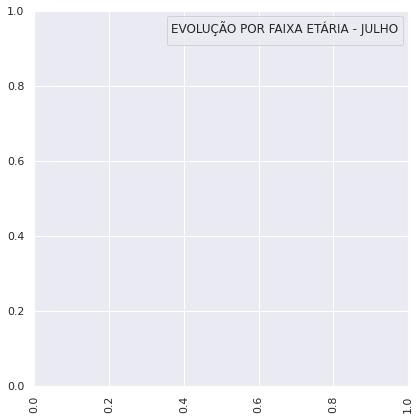

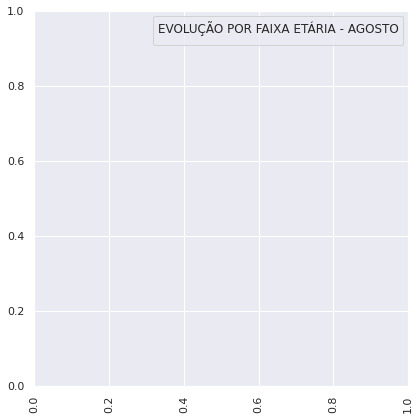

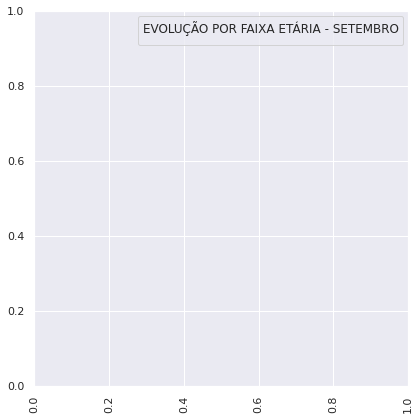

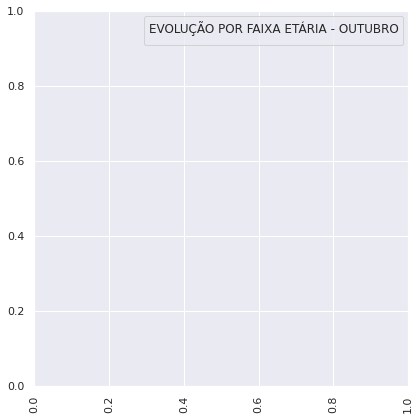

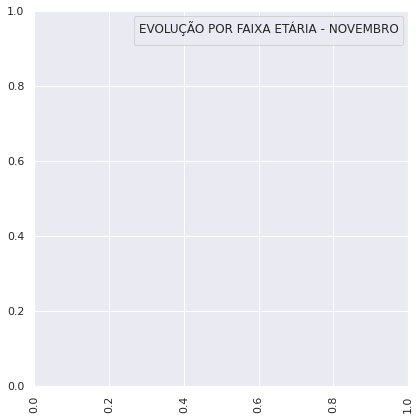

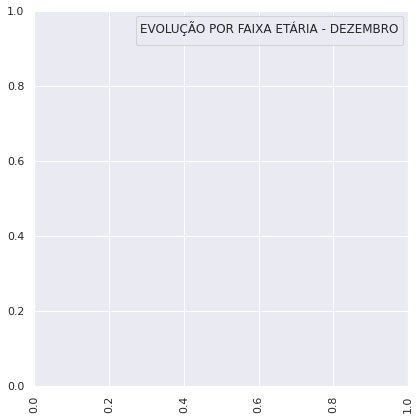

In [38]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

unique = df_2021["EVOLUCAO"].append(df_2021["AGE_GROUP"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})

months = {1:'JANEIRO', 2:'FEVEREIRO', 3:'MARÇO', 4:'ABRIL', 5:'MAIO', 6:'JUNHO',
          7:'JULHO', 8:'AGOSTO', 9:'SETEMBRO', 10:'OUTUBRO', 11:'NOVEMBRO', 12:'DEZEMBRO'}

for month in months:

    # set the figure size
    plt.figure(figsize=(6, 6))
    
    evolutions_cat = {'1': 'CURA', '2': 'ÓBITO', '3': 'ÓBITO OUTRAS CAUSA', '9': 'IGNORADO', 'NULO': 'NULO'}

    data = df_2021[(df_2021['month(DT_SIN_PRI)'] == month) & (df_2021['EVOLUCAO'] == '1')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar1 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, ci=None, palette=palette)
        leg_bar1 = mpatches.Patch(color='darkblue', label='CURA')
        bar1.set(ylim=(0, 1500))

    data = df_2021[(df_2021['month(DT_SIN_PRI)'] == month) & (df_2021['EVOLUCAO'] == '2')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar2 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar2 = mpatches.Patch(color='darkblue' ,label='ÓBITO')
        bar2.set(ylim=(0, 1500))

    data = df_2021[(df_2021['month(DT_SIN_PRI)'] == month) & (df_2021['EVOLUCAO'] == '3')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar3 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar3 = mpatches.Patch(color='darkblue', label='ÓBITO OUTRAS CAUSAS')
        bar3.set(ylim=(0, 1500))

    data = df_2021[(df_2021['month(DT_SIN_PRI)'] == month) & (df_2021['EVOLUCAO'] == '9')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar4 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar4 = mpatches.Patch(color='darkblue', label='IGNORADO')
        bar4.set(ylim=(0, 1500))

    data = df_2021[(df_2021['month(DT_SIN_PRI)'] == month) & (df_2021['EVOLUCAO'] == 'NULO')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar5 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar5 = mpatches.Patch(color='darkblue', label='NULO')
        bar5.set(ylim=(0, 1500))

    plt.legend(title='EVOLUÇÃO POR FAIXA ETÁRIA - ' + months[month], loc='upper right', labels=['CURA / 10', 'OBITO / 10', 'OBITO OUTRAS CAUSAS / 10', 'NULO / 10'])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

<hr /> 

In [6]:
norte_v = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
nordeste_v = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
centro_oeste_v = ['MT', 'MS', 'GO']
sudeste_v = ['SP', 'RJ', 'ES', 'MG']
sul_v = ['PR', 'RS', 'SC']

In [7]:
df_2019_norte = super_srag.filter((F.year('DT_SIN_PRI') == 2019) & (super_srag.SG_UF_NOT.isin(norte_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2019_norte = df_2019_norte.fillna('NULO')

df_2019_nordeste = super_srag.filter((F.year('DT_SIN_PRI') == 2019) & (super_srag.SG_UF_NOT.isin(nordeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2019_nordeste = df_2019_nordeste.fillna('NULO')

df_2019_centro = super_srag.filter((F.year('DT_SIN_PRI') == 2019) & (super_srag.SG_UF_NOT.isin(centro_oeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2019_centro = df_2019_centro.fillna('NULO')

df_2019_sudeste = super_srag.filter((F.year('DT_SIN_PRI') == 2019) & (super_srag.SG_UF_NOT.isin(sudeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2019_sudeste = df_2019_sudeste.fillna('NULO')

df_2019_sul = super_srag.filter((F.year('DT_SIN_PRI') == 2019) & (super_srag.SG_UF_NOT.isin(sul_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2019_sul = df_2019_sul.fillna('NULO')

In [8]:
df_2020_norte = super_srag.filter((F.year('DT_SIN_PRI') == 2020) & (super_srag.SG_UF_NOT.isin(norte_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2020_norte = df_2020_norte.fillna('NULO')

df_2020_nordeste = super_srag.filter((F.year('DT_SIN_PRI') == 2020) & (super_srag.SG_UF_NOT.isin(nordeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2020_nordeste = df_2020_nordeste.fillna('NULO')

df_2020_centro = super_srag.filter((F.year('DT_SIN_PRI') == 2020) & (super_srag.SG_UF_NOT.isin(centro_oeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2020_centro = df_2020_centro.fillna('NULO')

df_2020_sudeste = super_srag.filter((F.year('DT_SIN_PRI') == 2020) & (super_srag.SG_UF_NOT.isin(sudeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2020_sudeste = df_2020_sudeste.fillna('NULO')

df_2020_sul = super_srag.filter((F.year('DT_SIN_PRI') == 2020) & (super_srag.SG_UF_NOT.isin(sul_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2020_sul = df_2020_sul.fillna('NULO')

In [9]:
df_2021_norte = super_srag.filter((F.year('DT_SIN_PRI') == 2021) & (super_srag.SG_UF_NOT.isin(norte_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2021_norte = df_2021_norte.fillna('NULO')

df_2021_nordeste = super_srag.filter((F.year('DT_SIN_PRI') == 2021) & (super_srag.SG_UF_NOT.isin(nordeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2021_nordeste = df_2021_nordeste.fillna('NULO')

df_2021_centro = super_srag.filter((F.year('DT_SIN_PRI') == 2021) & (super_srag.SG_UF_NOT.isin(centro_oeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2021_centro = df_2021_centro.fillna('NULO')

df_2021_sudeste = super_srag.filter((F.year('DT_SIN_PRI') == 2021) & (super_srag.SG_UF_NOT.isin(sudeste_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2021_sudeste = df_2021_sudeste.fillna('NULO')

df_2021_sul = super_srag.filter((F.year('DT_SIN_PRI') == 2021) & (super_srag.SG_UF_NOT.isin(sul_v))).select(['DT_SIN_PRI', 'EVOLUCAO', 'AGE_GROUP'])\
            .groupBy([F.month('DT_SIN_PRI'), 'EVOLUCAO', 'AGE_GROUP']).count().orderBy(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP']).toPandas()
df_2021_sul = df_2021_sul.fillna('NULO')

In [10]:
age_groups = {1: '< 1', 2:'1a5', 3:'6a19', 4:'20a29', 5:'30a39', 6:'40a49', 7:'50a59', 8:'60a69', 9:'70a79', 10:'80a89', 11:'90+', 12:'NULO'}

for ag in list(age_groups.keys()):
    df_2019_norte['AGE_GROUP'] = df_2019_norte['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2019_nordeste['AGE_GROUP'] = df_2019_nordeste['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2019_centro['AGE_GROUP'] = df_2019_centro['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2019_sudeste['AGE_GROUP'] = df_2019_sudeste['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2019_sul['AGE_GROUP'] = df_2019_sul['AGE_GROUP'].replace(ag, age_groups[ag])
    
    df_2020_norte['AGE_GROUP'] = df_2019_norte['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2020_nordeste['AGE_GROUP'] = df_2019_nordeste['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2020_centro['AGE_GROUP'] = df_2019_centro['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2020_sudeste['AGE_GROUP'] = df_2019_sudeste['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2020_sul['AGE_GROUP'] = df_2019_sul['AGE_GROUP'].replace(ag, age_groups[ag])
    
    df_2021_norte['AGE_GROUP'] = df_2019_norte['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2021_nordeste['AGE_GROUP'] = df_2019_nordeste['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2021_centro['AGE_GROUP'] = df_2019_centro['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2021_sudeste['AGE_GROUP'] = df_2019_sudeste['AGE_GROUP'].replace(ag, age_groups[ag])
    df_2021_sul['AGE_GROUP'] = df_2019_sul['AGE_GROUP'].replace(ag, age_groups[ag])

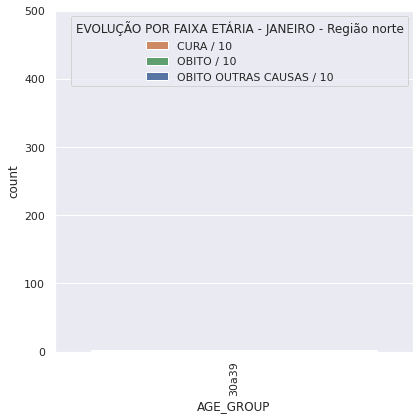

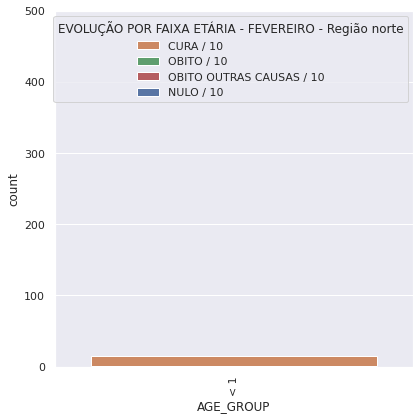

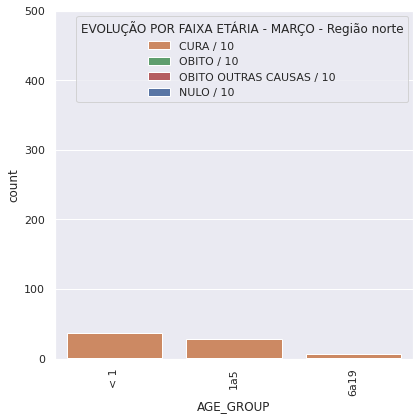

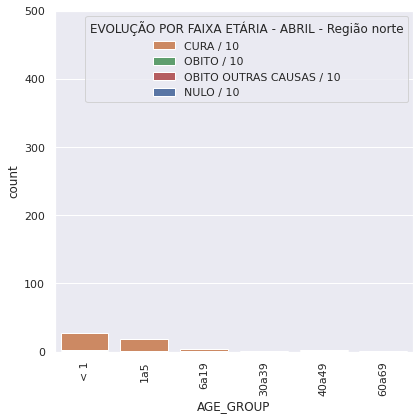

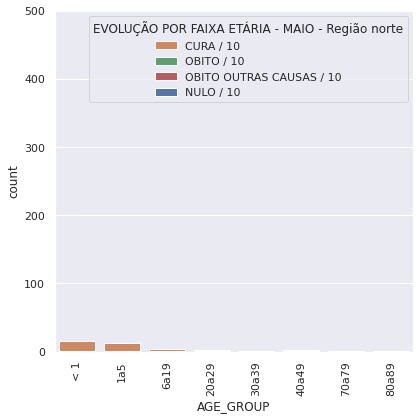

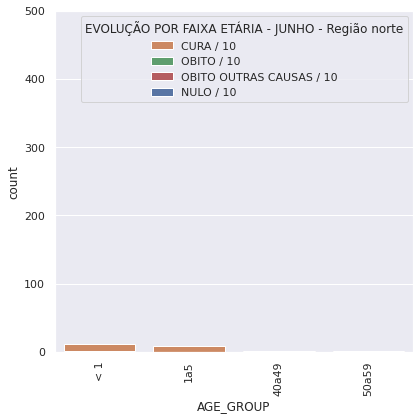

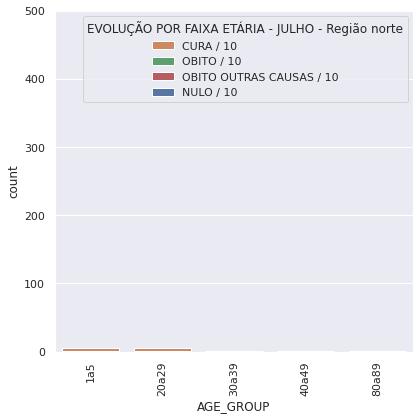

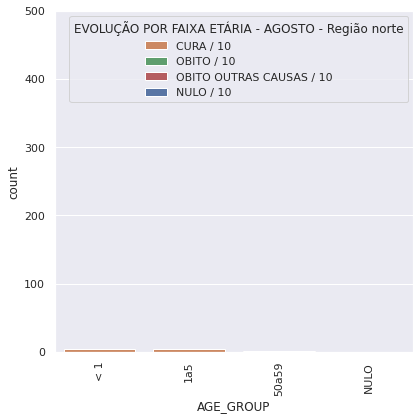

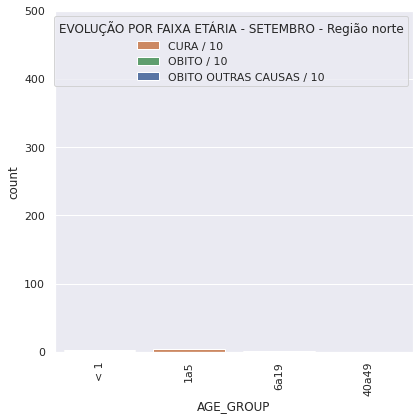

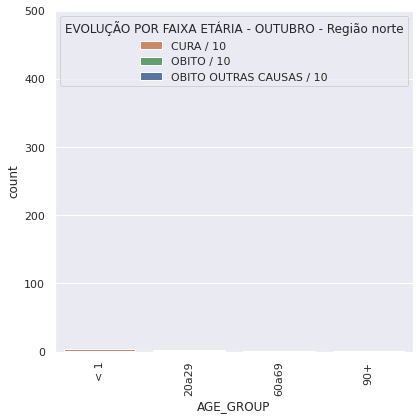

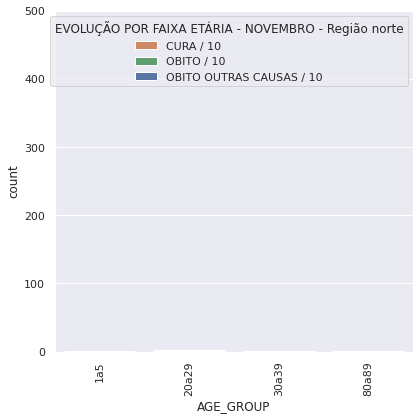

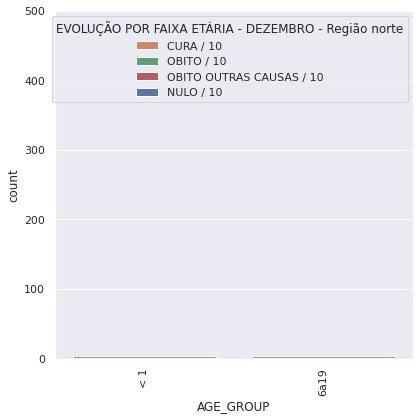

In [55]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

unique = df_2019_norte["EVOLUCAO"].append(df_2019_norte["AGE_GROUP"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})

months = {1:'JANEIRO', 2:'FEVEREIRO', 3:'MARÇO', 4:'ABRIL', 5:'MAIO', 6:'JUNHO',
          7:'JULHO', 8:'AGOSTO', 9:'SETEMBRO', 10:'OUTUBRO', 11:'NOVEMBRO', 12:'DEZEMBRO'}

for month in months:

    # set the figure size
    plt.figure(figsize=(6, 6))
    
    evolutions_cat = {'1': 'CURA', '2': 'ÓBITO', '3': 'ÓBITO OUTRAS CAUSA', '9': 'IGNORADO', 'NULO': 'NULO'}

    data = df_2019_norte[(df_2019_norte['month(DT_SIN_PRI)'] == month) & (df_2019_norte['EVOLUCAO'] == '1')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar1 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, ci=None, palette=palette)
        leg_bar1 = mpatches.Patch(color='darkblue', label='CURA')
        bar1.set(ylim=(0, 500))

    data = df_2019_norte[(df_2019_norte['month(DT_SIN_PRI)'] == month) & (df_2019_norte['EVOLUCAO'] == '2')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar2 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar2 = mpatches.Patch(color='darkblue' ,label='ÓBITO')
        bar2.set(ylim=(0, 500))

    data = df_2019_norte[(df_2019_norte['month(DT_SIN_PRI)'] == month) & (df_2019_norte['EVOLUCAO'] == '3')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar3 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar3 = mpatches.Patch(color='darkblue', label='ÓBITO OUTRAS CAUSAS')
        bar3.set(ylim=(0, 500))

    data = df_2019_norte[(df_2019_norte['month(DT_SIN_PRI)'] == month) & (df_2019_norte['EVOLUCAO'] == '9')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar4 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar4 = mpatches.Patch(color='darkblue', label='IGNORADO')
        bar4.set(ylim=(0, 500))

    data = df_2019_norte[(df_2019_norte['month(DT_SIN_PRI)'] == month) & (df_2019_norte['EVOLUCAO'] == 'NULO')]
    data.loc[:,['count']] = data['count']/10
    
    if len(data) > 0:
        bar5 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=data, estimator=sum, ci=None, palette=palette)
        leg_bar5 = mpatches.Patch(color='darkblue', label='NULO')
        bar5.set(ylim=(0, 500))

    plt.legend(title='EVOLUÇÃO POR FAIXA ETÁRIA - ' + months[month] + ' - Região norte', loc='upper right', labels=['CURA / 10', 'OBITO / 10', 'OBITO OUTRAS CAUSAS / 10', 'NULO / 10'])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

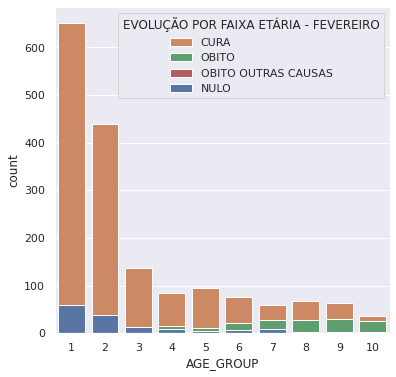

In [14]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

unique = df_2019["EVOLUCAO"].append(df_2019["AGE_GROUP"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})


# set the figure size
plt.figure(figsize=(6, 6))


bar1 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 2) & (df_2019['EVOLUCAO'] == '1')], ci=None, palette=palette)
leg_bar1 = mpatches.Patch(color='darkblue', label='CURA')


bar2 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 2) & (df_2019['EVOLUCAO'] == '2')], estimator=sum, ci=None, palette=palette)
leg_bar2 = mpatches.Patch(color='darkblue' ,label='ÓBITO')

if len(df_2019[(df_2019['month(DT_SIN_PRI)'] == 1) & (df_2019['EVOLUCAO'] == '3')]) > 0:
    bar3 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 2) & (df_2019['EVOLUCAO'] == '3')], estimator=sum, ci=None, palette=palette)
    leg_bar3 = mpatches.Patch(color='darkblue', label='ÓBITO OUTRAS CAUSAS')

bar4 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 2) & (df_2019['EVOLUCAO'] == '9')], estimator=sum, ci=None, palette=palette)
leg_bar4 = mpatches.Patch(color='darkblue', label='IGNORADO')

bar5 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 2) & (df_2019['EVOLUCAO'] == 'NULO')], estimator=sum, ci=None, palette=palette)
leg_bar5 = mpatches.Patch(color='darkblue', label='NULO')

plt.legend(title='EVOLUÇÃO POR FAIXA ETÁRIA - FEVEREIRO', loc='upper right', labels=['CURA', 'OBITO', 'OBITO OUTRAS CAUSAS', 'NULO'])



# # add legend
# leg_bar1 = mpatches.Patch(color=, label='CURA')
# leg_bar2 = mpatches.Patch(color='lightblue', label='EVOLUCAO = 2')
# plt.legend(handles=[leg_bar1, leg_bar2, leg_bar4])

AttributeError: 'AxesSubplot' object has no attribute 'map'

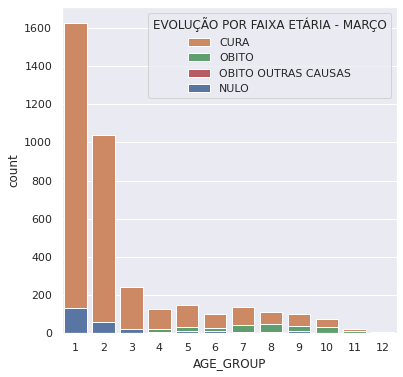

In [85]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

unique = df_2019["EVOLUCAO"].append(df_2019["AGE_GROUP"]).unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
palette.update({"Total":"k"})


# set the figure size
plt.figure( figsize=(6, 6))


bar1 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 3) & (df_2019['EVOLUCAO'] == '1')], ci=None, palette=palette)
leg_bar1 = mpatches.Patch(color='darkblue', label='CURA')


bar2 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 3) & (df_2019['EVOLUCAO'] == '2')], estimator=sum, ci=None, palette=palette)
leg_bar2 = mpatches.Patch(color='darkblue' ,label='ÓBITO')

if len(df_2019[(df_2019['month(DT_SIN_PRI)'] == 1) & (df_2019['EVOLUCAO'] == '3')]) > 0:
    bar3 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 3) & (df_2019['EVOLUCAO'] == '3')], estimator=sum, ci=None, palette=palette)
    leg_bar3 = mpatches.Patch(color='darkblue', label='ÓBITO OUTRAS CAUSAS')

bar4 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 3) & (df_2019['EVOLUCAO'] == '9')], estimator=sum, ci=None, palette=palette)
leg_bar4 = mpatches.Patch(color='darkblue', label='IGNORADO')

bar5 = sns.barplot(x="AGE_GROUP", y="count", hue="EVOLUCAO", data=df_2019[(df_2019['month(DT_SIN_PRI)'] == 3) & (df_2019['EVOLUCAO'] == 'NULO')], estimator=sum, ci=None, palette=palette)
leg_bar5 = mpatches.Patch(color='darkblue', label='NULO')

plt.legend(title='EVOLUÇÃO POR FAIXA ETÁRIA - MARÇO', loc='upper right', labels=['CURA', 'OBITO', 'OBITO OUTRAS CAUSAS', 'NULO'])



# # add legend
# leg_bar1 = mpatches.Patch(color=, label='CURA')
# leg_bar2 = mpatches.Patch(color='lightblue', label='EVOLUCAO = 2')
# plt.legend(handles=[leg_bar1, leg_bar2, leg_bar4])

In [52]:
bar1.get_xticklabels()

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '12')]

In [18]:
df_2019.columns

Index(['month(DT_SIN_PRI)', 'EVOLUCAO', 'AGE_GROUP', 'count'], dtype='object')

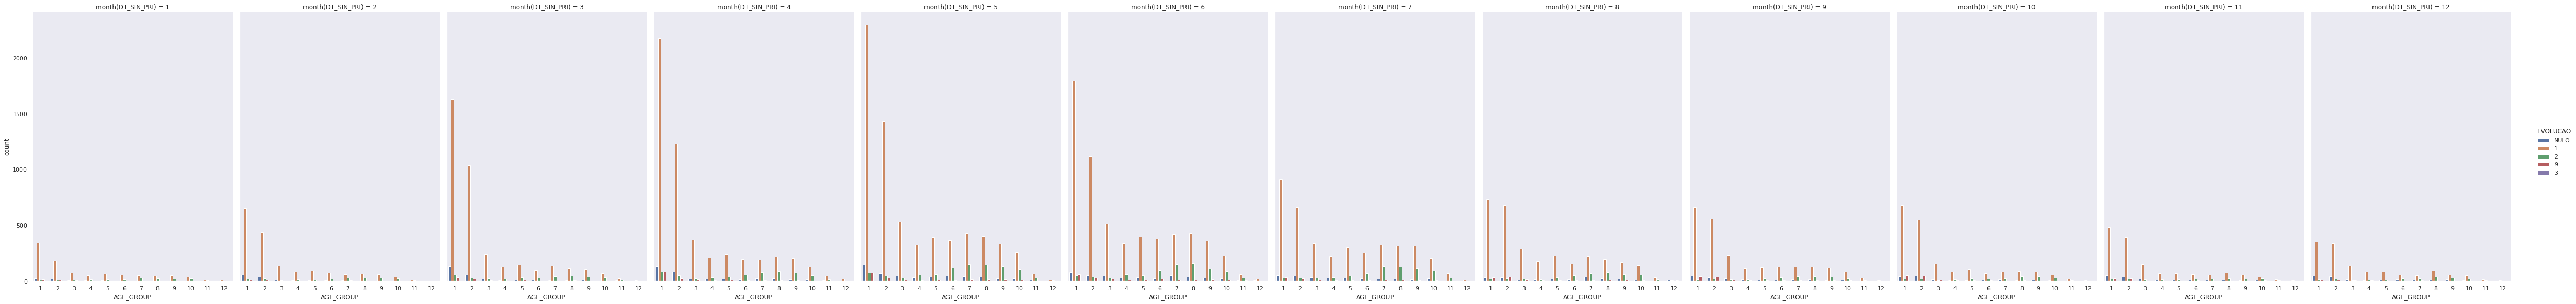

In [25]:
sns.catplot(x="AGE_GROUP", y="count",
            hue="EVOLUCAO", col="month(DT_SIN_PRI)",
            data=df_2019, kind="bar",
            height=8, aspect=.7);

In [53]:
df_2019[(df_2019['month(DT_SIN_PRI)'] == 1) & (df_2019['EVOLUCAO'] == '1')].reset_index()

,index,month(DT_SIN_PRI),EVOLUCAO,AGE_GROUP,count
0,11,1,1,1,342
1,12,1,1,2,185
2,13,1,1,3,76
3,14,1,1,4,51
4,15,1,1,5,65
5,16,1,1,6,56
6,17,1,1,7,55
7,18,1,1,8,48
8,19,1,1,9,53
9,20,1,1,10,40


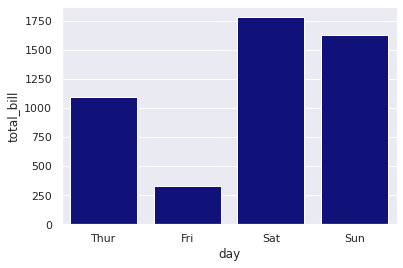

In [42]:
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

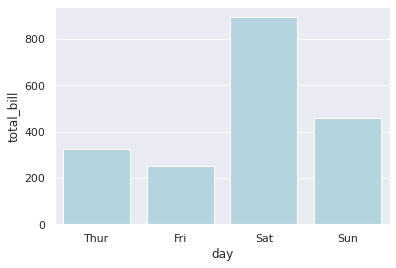

In [44]:
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

In [45]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


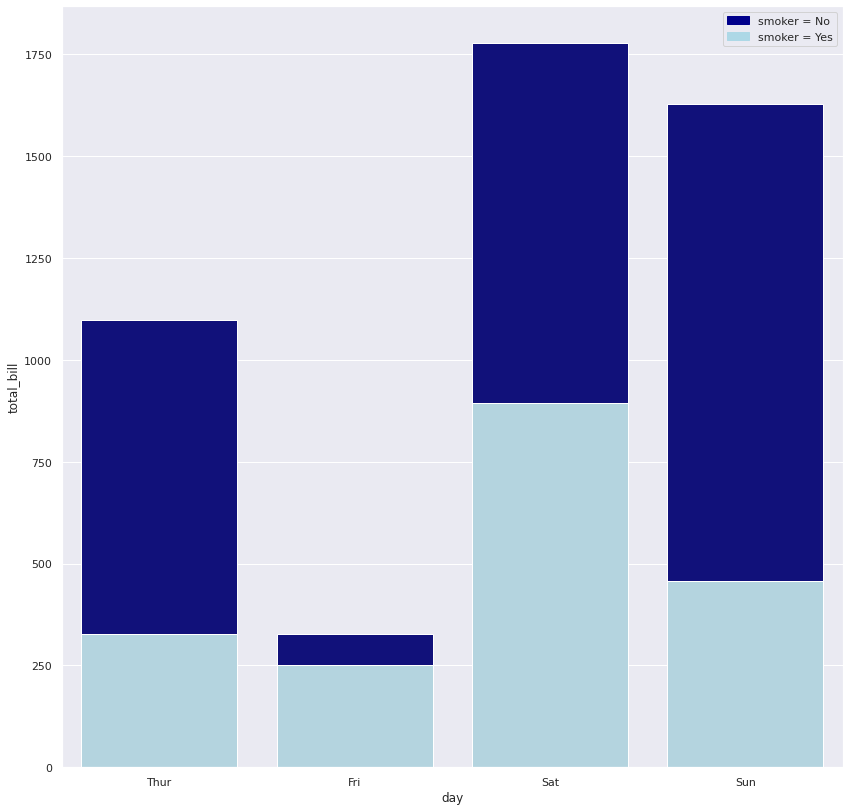

In [41]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = tips.groupby('day')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [57]:
d = df_2019[(df_2019['month(DT_SIN_PRI)'] == 3) & (df_2019['EVOLUCAO'] == '1')]

In [62]:
d

,month(DT_SIN_PRI),EVOLUCAO,AGE_GROUP,count
96,3,1,1,1627
97,3,1,2,1038
98,3,1,3,241
99,3,1,4,129
100,3,1,5,147
101,3,1,6,102
102,3,1,7,137
103,3,1,8,114
104,3,1,9,103
105,3,1,10,74


In [79]:
nobs = d[['month(DT_SIN_PRI)', 'count']]
nobs = ["n: " + str(i) for s in nobs.values for i in s]
pos = range(len(nobs))

for tick,label in zip(pos,ax.get_xticklabels()):
    bar1.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [59]:
len(d)

12

In [77]:
nobs = tips.groupby(['day'])['total_bill'].agg(['count'])


KeyError: 0

In [76]:
nobs

['n: 3',
 'n: 1627',
 'n: 3',
 'n: 1038',
 'n: 3',
 'n: 241',
 'n: 3',
 'n: 129',
 'n: 3',
 'n: 147',
 'n: 3',
 'n: 102',
 'n: 3',
 'n: 137',
 'n: 3',
 'n: 114',
 'n: 3',
 'n: 103',
 'n: 3',
 'n: 74',
 'n: 3',
 'n: 25',
 'n: 3',
 'n: 6']

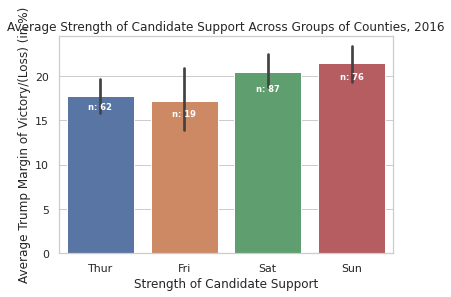

In [53]:
import seaborn as sns

sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)
ax.set(xlabel='Strength of Candidate Support', ylabel='Average Trump Margin of Victory/(Loss) (in %)')  
ax.set_title('Average Strength of Candidate Support Across Groups of Counties, 2016')

medians = tips.groupby(['day'])['total_bill'].median().values
nobs = tips.groupby(['day'])['total_bill'].agg(['count'])
nobs = ["n: " + str(i) for s in nobs.values for i in s]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

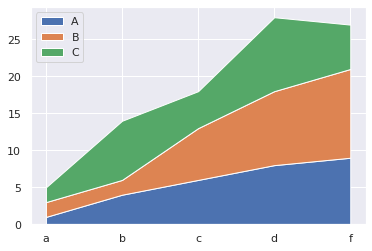

In [90]:
# library
import numpy as np
import matplotlib.pyplot as plt

# Create data
x=['a', 'b', 'c', 'd', 'f']
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]

# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')